In [ ]:
!pip install capymoa

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 38.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=3c11ad9b95d32328f1433031de14355bea4226f394a098ac366055ab73bd1f9b
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget



HT metrics (first 5 windows):


,instances,accuracy,kappa,kappa_t,kappa_m,f1_score,f1_score_0,f1_score_1,precision,precision_0,precision_1,recall,recall_0,recall_1
0,200.0,90.5,75.471211,74.666667,58.695652,87.764831,81.904762,93.559322,87.075089,79.62963,94.520548,88.465588,84.313725,92.61745
1,400.0,95.5,89.551892,89.655172,86.567164,95.024188,92.800000,96.727273,96.830986,100.00000,93.661972,93.283582,86.567164,100.00000
2,600.0,92.5,80.998227,83.146067,75.409836,91.266630,85.981308,94.880546,95.129870,100.00000,90.259740,87.704918,75.409836,100.00000
3,800.0,93.0,82.743745,83.132530,77.777778,92.012780,87.500000,95.138889,95.364238,100.00000,90.728477,88.888889,77.777778,100.00000
4,1000.0,93.5,84.049080,86.021505,79.365079,92.578002,88.495575,95.470383,95.666667,100.00000,91.333333,89.682540,79.365079,100.00000



AHT metrics (first 5 windows):


,instances,accuracy,kappa,kappa_t,kappa_m,f1_score,f1_score_0,f1_score_1,precision,precision_0,precision_1,recall,recall_0,recall_1
0,200.0,90.0,74.015850,73.333333,56.521739,87.020855,80.769231,93.243243,86.561417,79.245283,93.877551,87.485195,82.352941,92.61745
1,400.0,96.0,90.748236,90.804598,88.059701,95.570812,93.650794,97.080292,97.163121,100.000000,94.326241,94.029851,88.059701,100.00000
2,600.0,93.0,82.352200,84.269663,77.049180,91.845294,87.037037,95.205479,95.424837,100.000000,90.849673,88.524590,77.049180,100.00000
3,800.0,92.0,80.097027,80.722892,74.603175,90.883191,85.454545,94.482759,94.771242,100.000000,89.542484,87.301587,74.603175,100.00000
4,1000.0,93.5,84.049080,86.021505,79.365079,92.578002,88.495575,95.470383,95.666667,100.000000,91.333333,89.682540,79.365079,100.00000



NB metrics (first 5 windows):


,instances,accuracy,kappa,kappa_t,kappa_m,f1_score,f1_score_0,f1_score_1,precision,precision_0,precision_1,recall,recall_0,recall_1
0,200.0,90.5,75.471211,74.666667,58.695652,87.764831,81.904762,93.559322,87.075089,79.62963,94.520548,88.465588,84.313725,92.61745
1,400.0,95.5,89.551892,89.655172,86.567164,95.024188,92.800000,96.727273,96.830986,100.00000,93.661972,93.283582,86.567164,100.00000
2,600.0,92.5,80.998227,83.146067,75.409836,91.266630,85.981308,94.880546,95.129870,100.00000,90.259740,87.704918,75.409836,100.00000
3,800.0,93.0,82.743745,83.132530,77.777778,92.012780,87.500000,95.138889,95.364238,100.00000,90.728477,88.888889,77.777778,100.00000
4,1000.0,93.5,84.049080,86.021505,79.365079,92.578002,88.495575,95.470383,95.666667,100.00000,91.333333,89.682540,79.365079,100.00000


HT cumulative accuracy = 95.480
HT cumulative kappa = 89.382
AHT cumulative accuracy = 95.820
AHT cumulative kappa = 90.273
NB cumulative accuracy = 94.220
NB cumulative kappa = 86.032


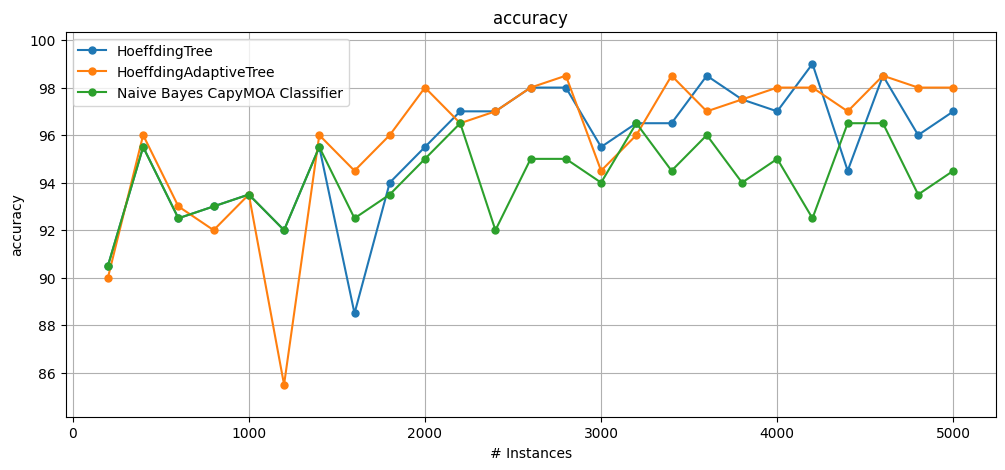

In [ ]:
from capymoa.stream.generator import SEA
from capymoa.classifier import HoeffdingTree, HoeffdingAdaptiveTree, NaiveBayes
from capymoa.evaluation import prequential_evaluation_multiple_learners
from capymoa.evaluation.visualization import plot_windowed_results

# 1. Create a SEA stream
stream = SEA(function=1, instance_random_seed=42, noise_percentage=0)

# 2. Define learners
schema = stream.get_schema()
learners = {
    "HT": HoeffdingTree(schema=schema, grace_period=50),
    "AHT": HoeffdingAdaptiveTree(schema=schema, grace_period=50),
    "NB": NaiveBayes(schema=schema)
}

# 3. Prequential evaluation
results = prequential_evaluation_multiple_learners(
    stream=stream,
    learners=learners,
    window_size=200,
    max_instances=5000
)

# 4. Extract and display multiple metrics
for name, res in results.items():
    df_metrics = res.windowed.metrics_per_window()
    print(f"\n{name} metrics (first 5 windows):")
    display(df_metrics.head())

# 5. Plot windowed accuracy
plot_windowed_results(*[results[name] for name in learners.keys()], metric="accuracy")

# 6. Print cumulative metrics
for name, res in results.items():
    print(f"{name} cumulative accuracy = {res.cumulative.accuracy():.3f}")
    if hasattr(res.cumulative, "kappa"):
        print(f"{name} cumulative kappa = {res.cumulative.kappa():.3f}")
